In [10]:
# ===============================
# TITANIC DATASET - PREDICTION
# ===============================

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats

In [11]:
df = pd.read_csv("Titanic-Dataset.csv")

# First 5 rows
print(df.head())

# Shape
print("Shape:", df.shape)

# Column names
print("Columns:", df.columns)

# Detailed Info
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Sh

In [12]:
# Check missing values
print(df.isnull().sum())

# Mean imputation for numerical columns
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Drop remaining null rows
df.dropna(inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-2438183564.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [13]:
# Assume Survived is target
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (202, 10)
y shape: (202,)


In [14]:
# Label Encoding (Example: Sex)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# OneHot Encoding (Example: Embarked)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [19]:
X = df.drop(["Survived", "Name", "Ticket", "PassengerId", "Cabin"], axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [20]:
# Select only numerical columns
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

# ----------------------
# MinMaxScaler
# ----------------------
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_mms = mms.fit_transform(X_train_num)
X_test_mms = mms.transform(X_test_num)

# ----------------------
# StandardScaler
# ----------------------
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_num)
X_test_sc = sc.transform(X_test_num)

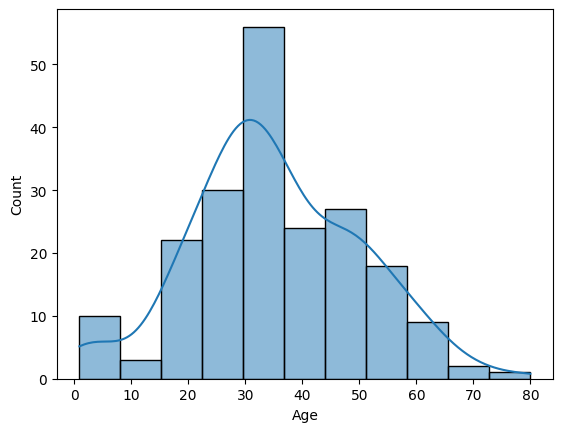

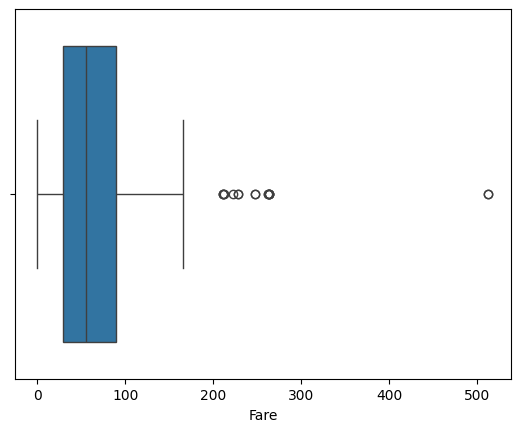

Skewness of Fare: 2.7335477962297685


In [21]:
# Histogram with KDE
sns.histplot(df['Age'], kde=True)
plt.show()

# Boxplot
sns.boxplot(x=df['Fare'])
plt.show()

# Skewness
print("Skewness of Fare:", df['Fare'].skew())

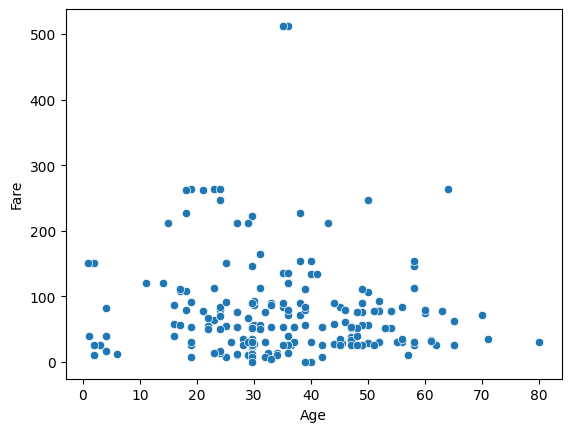

Correlation: -0.0766799991447473


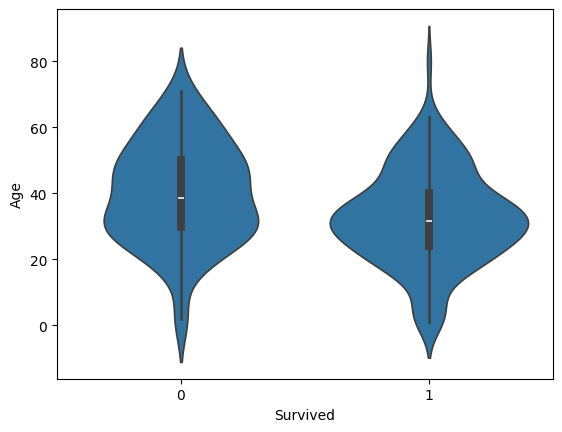

In [29]:
# Scatter plot
sns.scatterplot(x='Age', y='Fare', data=df)
plt.show()

# Pearson Correlation
print("Correlation:", df['Age'].corr(df['Fare']))

# Violin Plot
sns.violinplot(x='Survived', y='Age', data=df)
plt.show()

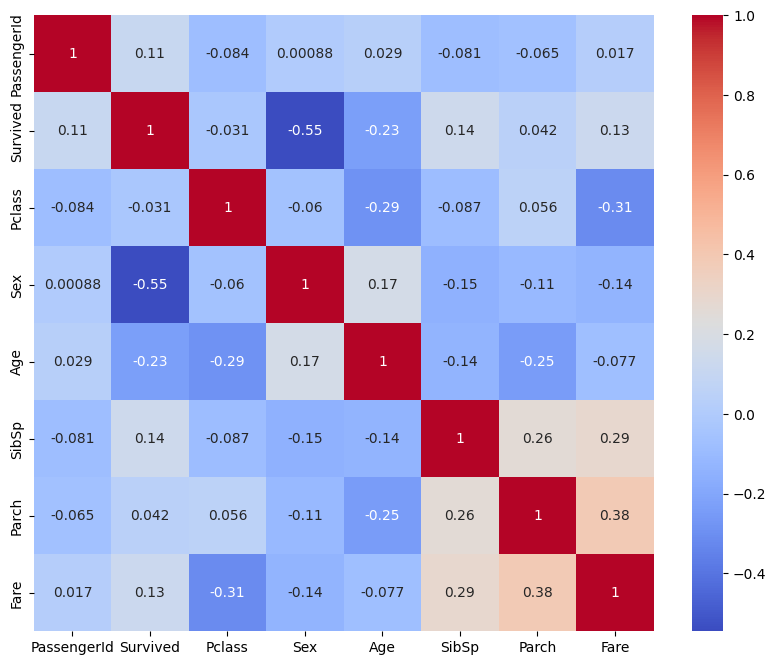

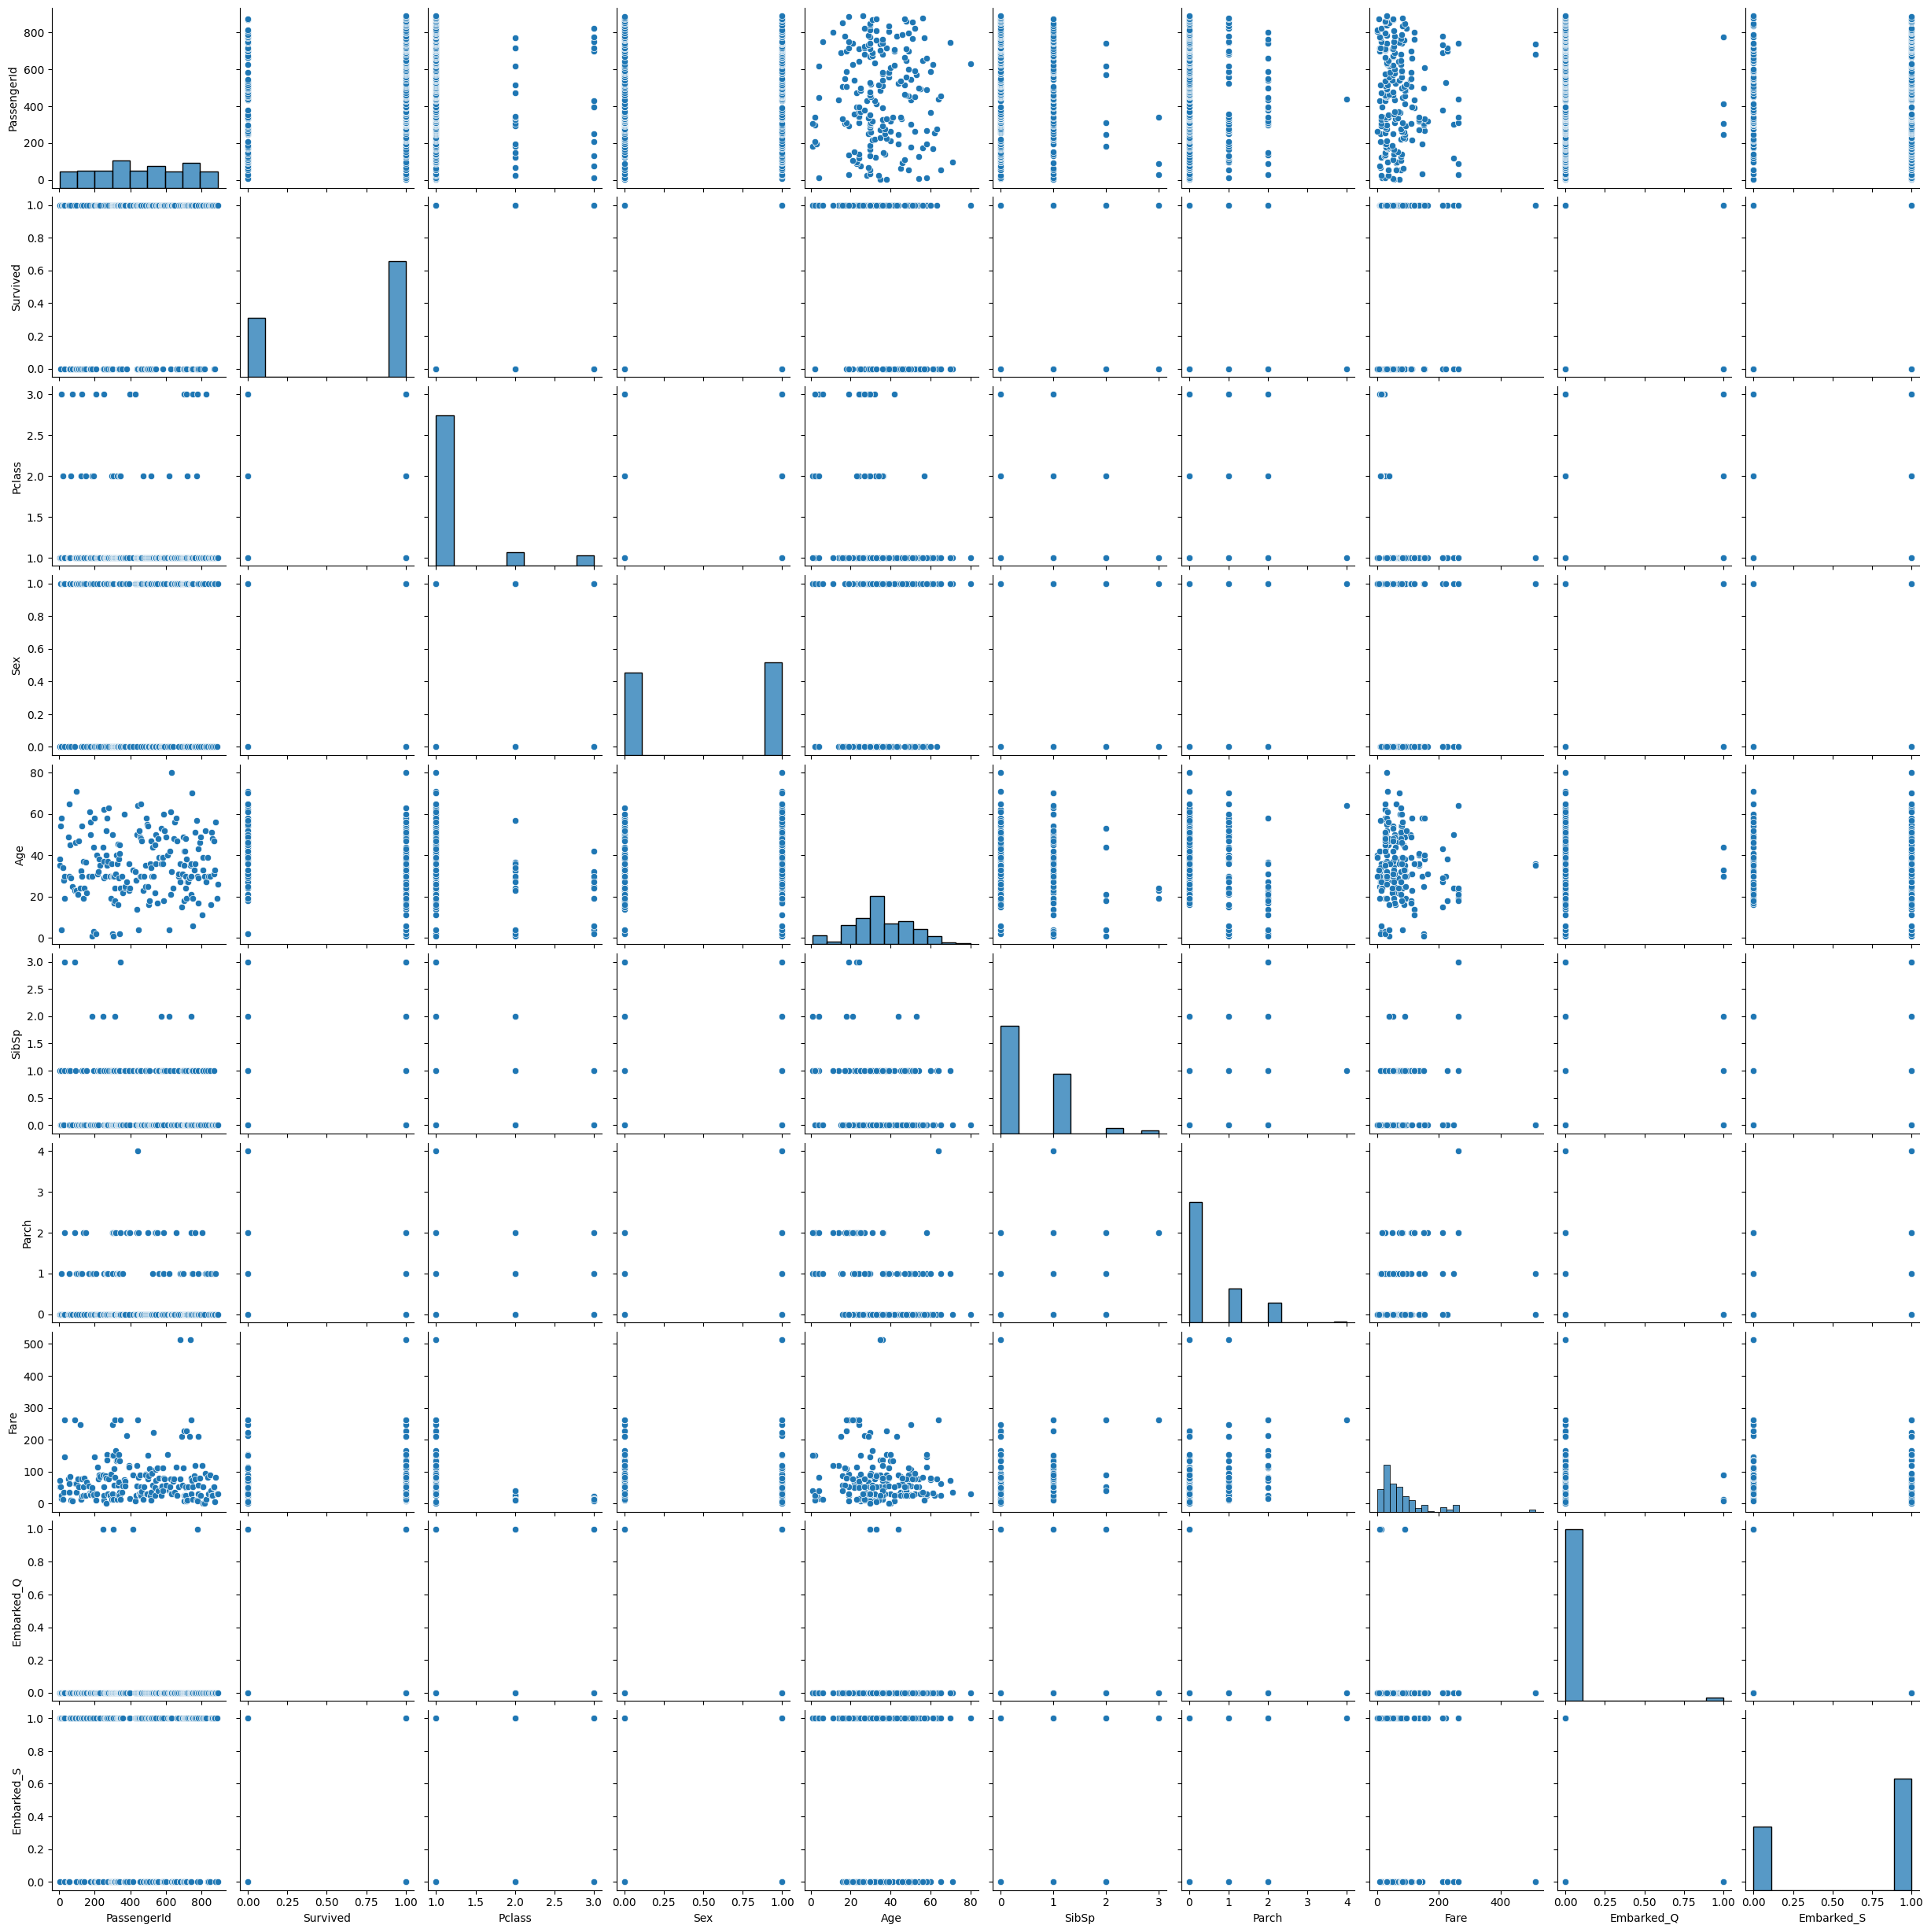

In [31]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()
# Pairplot
sns.pairplot(df)
plt.show()

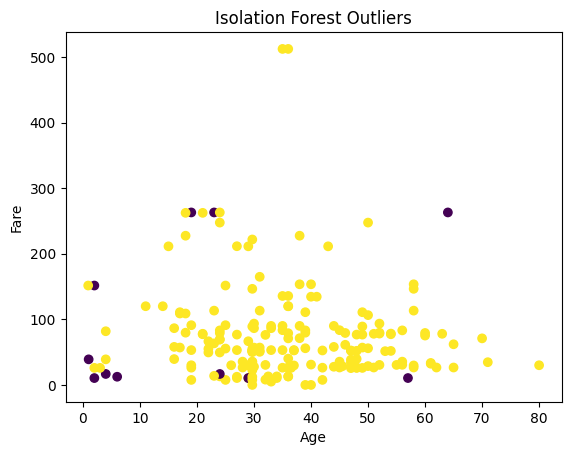

In [33]:
iso = IsolationForest(contamination=0.05)
pred = iso.fit_predict(numeric_df)

plt.scatter(numeric_df['Age'], numeric_df['Fare'], c=pred)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Isolation Forest Outliers")
plt.show()